# Homework Exercises 1-5 - Plots and calculations


In [2]:
#import the necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
import csv



## Exercise 1 - Sampling random points within D- dimensional domains by hit and miss
For the random number generation see "exercise1.c", with the results saved to data.csv, which are  then plotted below.

#### A)  Sampling uniformly from a rectangle with the edges [a,b], [c,d]

as one can see in Fig 1, the uniform sampling (in this case N= 1000  in [-2,2]x[-1.5,1.5]) seems to have been sucessful.

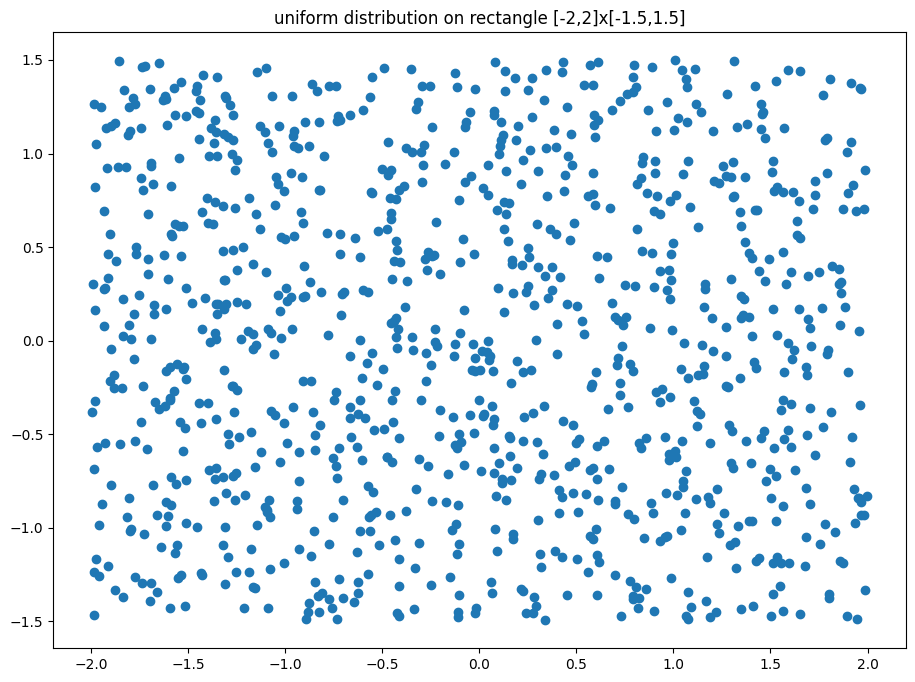

In [3]:
#read in the data from csv file
data = []
with open('data1.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('float64'))
x,y, x_circle, y_circle,rec,circle,N=data    

fig,ax =plt.subplots(1,1,figsize=(11,8))
ax.set_title("uniform distribution on rectangle [-2,2]x[-1.5,1.5]")
ax.scatter(x,y)
#print(y)

#### B ) Using the Hit and Miss Method for estimating the Area of the rectangle, and also of a unit disk withing the rectangle
The hit and miss method was implimented in c as described in the lecture, and tested for different numbers of sampled points.
In the case of estimating the area of the whole rectangle, it is impossible to miss the area, and thus the estiamted area is always completely correct.

In Fig. 3, one can see the distribution of hits and misses for the more interesting case of estimating the area of a unit circle around the origin within the rectangle.
The true area of a unit disk is $A = \pi$. Even for small  n (eg. N=10) the Area estimate by hit and miss is surprisingly good. again, one can see that the Area estimate converges to the true value.



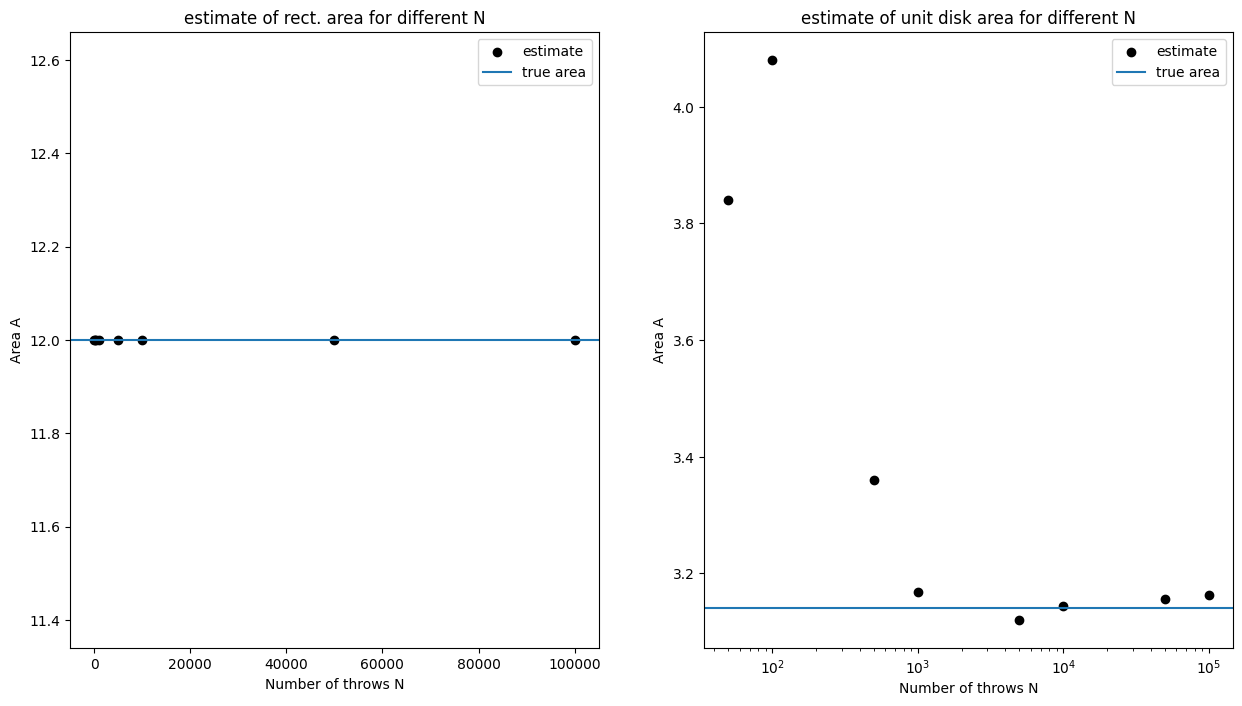

In [4]:
fig,axs= plt.subplots(1,2,figsize=(15,8))

axs[0].set_title("estimate of rect. area for different N")
axs[0].scatter(N,rec, color= "black",label= "estimate")
axs[0].axhline(12, label = "true area")
axs[0].set_ylabel("Area A")
axs[0].set_xlabel("Number of throws N")

axs[1].set_title("estimate of unit disk area for different N")
axs[1].scatter(N,circle, color= "black",label= "estimate")
axs[1].axhline(np.pi, label = "true area")
axs[1].set_ylabel("Area A")
axs[1].set_xlabel("Number of throws N")
plt.xscale("log")
axs[1].legend()
axs[0].legend()

## Exercise 2 Sampling from a given Distribution
The handwritten calculations required for using the inversion method to sample from a powerlaw distribution can be found in exercise2_handwritten.pdf.
This was then implemented in exercise2.c , points were sampled first from a power law probability distribution with exponent n=3 and  n=4 on the interval [0,1], and then for n=2 on [0,2]. Normalised histograms of the sampled points were plotted along with the true powerlaw distribution they were sampled from. In all three cases they match perfectly.

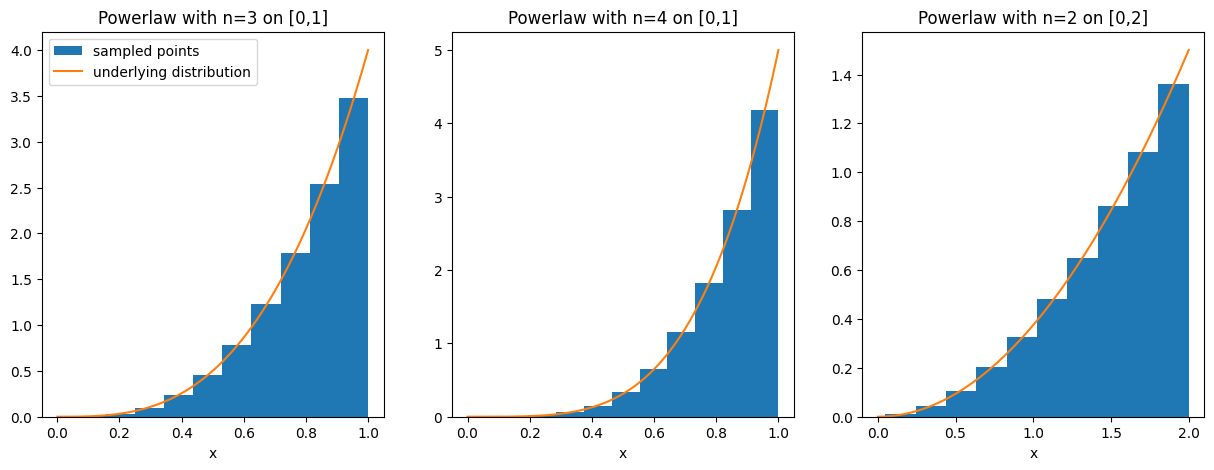

In [5]:
data2=[]
n1=3
n2=4
with open('data2.csv') as csvfile:
    
    content = csv.reader(csvfile, delimiter=";")
    next(content)#skip header line
    for row in content:

        data2.append(np.asarray(row).astype('float64'))
points_3=data2[0]
points_4=data2[1]
points_2= data2[2]

fig, axs =plt.subplots(1,3,figsize=(15,5))

axs[0].set_title("Powerlaw with n=3 on [0,1]")
axs[0].hist(x=points_3, density = True, label ="sampled points")
axs[0].set_xlabel("x")
x=np.linspace(0,1,1000)
axs[0].plot(x, x**(n1)*(n1+1), label= "underlying distribution")

axs[1].set_title("Powerlaw with n=4 on [0,1]")
axs[1].hist(x=points_4, density = True)
x=np.linspace(0,1,1000)
axs[1].plot(x, x**n2*(n2+1))
axs[1].set_xlabel("x")

axs[2].set_title("Powerlaw with n=2 on [0,2]")
axs[2].hist(x=points_2, density = True)
x=np.linspace(0,2,1000)
axs[2].plot(x, x**2*3/8)
axs[2].set_xlabel("x")
axs[0].legend()
plt.show()

## Exercise 3 Sampling via transformation of coordinates

### Sampling uniformly from a unit disk
The naive approach from the exercise does not produce the desired uniform dstribution of points across the disk, as the area grows with the square of the radius, the middle of the circle is oversampled. The right coordinate transform of the uniform distribution was carried out by hand in exercise2_handwritten.pdf, and implemented in exercise2.c, and the result of both approaches are plotted below. The proper coordinate transform leads to a nice uniform sampling.

In [8]:
data3=[]
with open('data3.csv') as csvfile:
    contents = csv.reader(csvfile, delimiter=";")
    next(contents)
    for row in contents:
    
        data3.append(np.asarray(row).astype('float64'))
        


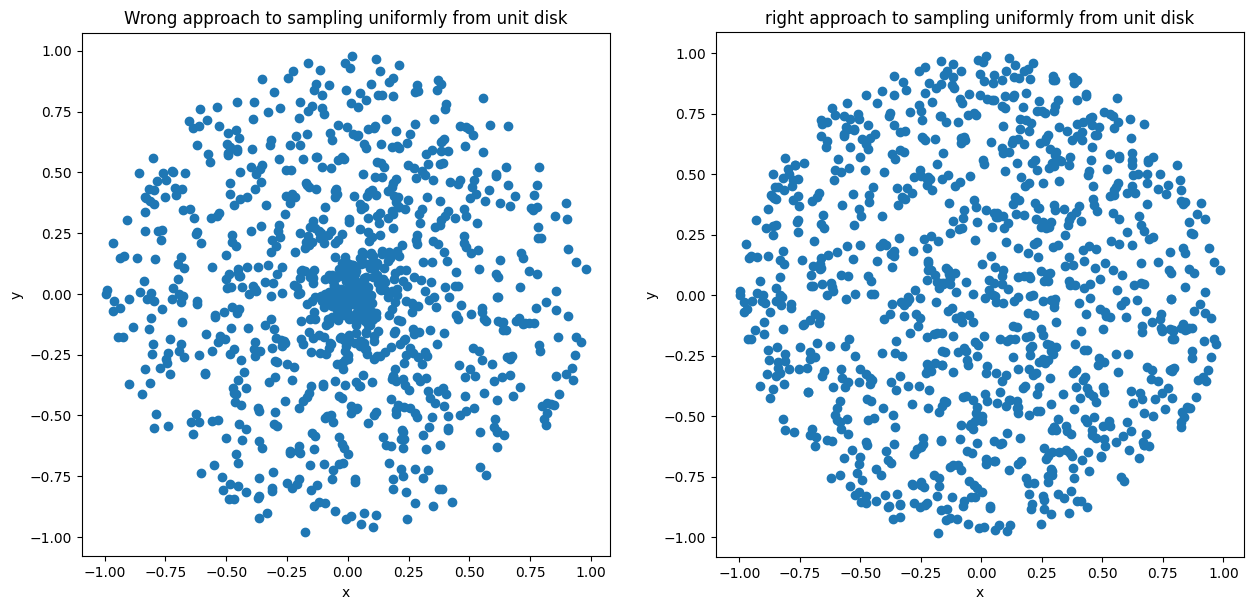

In [10]:

wrong_sampling_unit_disk_x= data3[0]
wrong_sampling_unit_disk_y= data3[1]

right_sampling_unit_disk_x= data3[2]
right_sampling_unit_disk_y= data3[3]

fig, axs = plt.subplots(1,2, figsize=(15,7.5))
axs[0].set_title("Wrong approach to sampling uniformly from unit disk")
axs[0].scatter(wrong_sampling_unit_disk_x,wrong_sampling_unit_disk_y)
axs[0].set_aspect("equal")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].set_title("right approach to sampling uniformly from unit disk")
axs[1].scatter(right_sampling_unit_disk_x,right_sampling_unit_disk_y)
axs[1].set_aspect("equal")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

plt.show()



### Sampling from a bivariate standard Normal distribution

Using a coordinate Transform to spherical coordinates followed by the inversion method (see  handwritten notes) points were generated  first from a standard bivariate distribution.  I understood the next part of the exercise to mean that this should be extended to a bivariate Gaussian without correlation. The necessary transform is  also derived in the handwritten notes. This sampling was then used to generate 

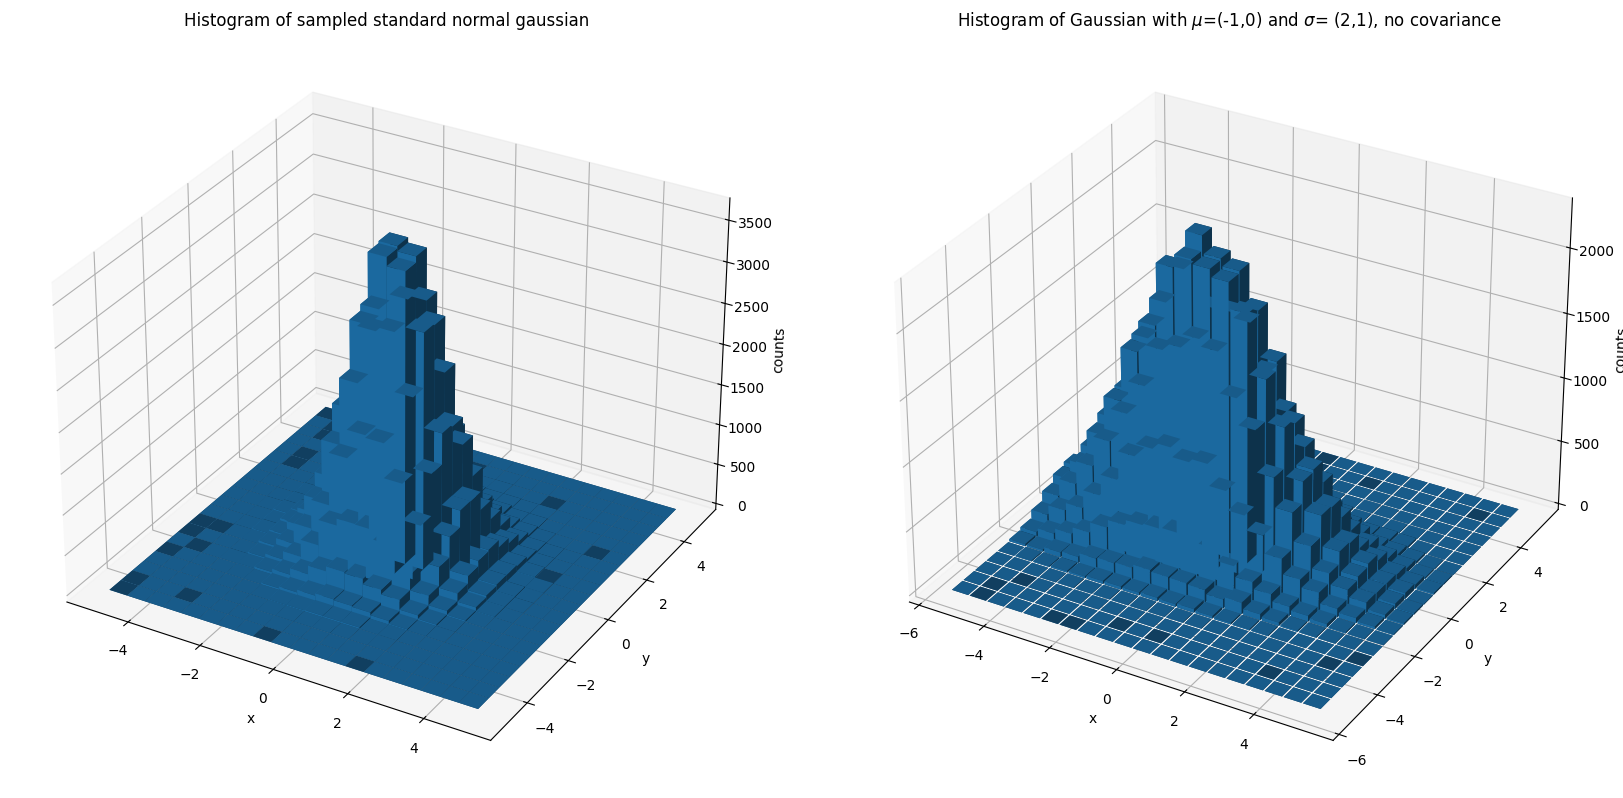

In [16]:
x= data3[6]
y=data3[7]
sig_x=2,
my_x=-1
sig_y=1
my_y=0

x_scaled=sig_x*x+my_x
y_scaled= sig_y*y+my_y

hist, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[-5, 5], [-5,5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

fig,axs= plt.subplots(1,2 ,figsize=(17,8),subplot_kw=dict(projection='3d'), tight_layout="True")


axs[0].bar3d(xpos, ypos, zpos, dx, dy, dz,)
axs[0].set_title("Histogram of sampled standard normal gaussian")
hist, xedges, yedges = np.histogram2d(x_scaled, y_scaled, bins=20, range=[[-5.5, 5.5], [-5.5,5.5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()


axs[1].bar3d(xpos, ypos, zpos, dx, dy, dz,)

axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_zlabel("counts")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_zlabel("counts")

axs[1].set_title("Histogram of Gaussian with $\mu$=(-1,0) and $\sigma$= (2,1), no covariance")
plt.show()



#### Rejection Method for Sampling from hard to invert functions

The goal of this exercise was to sample succesfully from the impossible to invert function $$f(x) = \sqrt{\frac{2}{\pi}} \ \text{exp(-x²)}$$. because this is not normalised on $[0,\infty]$, instead I aimed to sample from $$f(x) = \frac{2}{\sqrt{\pi}} \ \text{exp(-x²)}$$.

To achieve this, one can use the Rejection method, of sampling an $x_i $ according to a more accesible distribution $g(x)$ that closely resembles $f(x)$, drawing a random number $\xi$ from a uniform dist. on [0,1] and then rejecting all values $x_i$ where  $$ \xi >= \frac{f(x_i)}{c g(x_i)}$$


As instructed on the exercise sheet, I sampled from
\begin{equation}
g(x) \ = \ \begin{cases} A \text{\hspace{3cm}  if x} \leq p \\ \\ \frac{A} {p} \ x \; \text{exp(p²-x²)}\hspace{1cm}   \text{else} \end{cases}
\end{equation}
with the inversion method (see handwritten notes). Below I first plotted N=1000 values sampled from g(x) in a normalised histogram, and thus to make it clear if the sampling was succesful, also a normalised g(x). By hand, I found out that the right Z to normalise g(x) is  given by $Z= A/p + A/2p$. Below one can see that the sampling  from g(x) works very well.



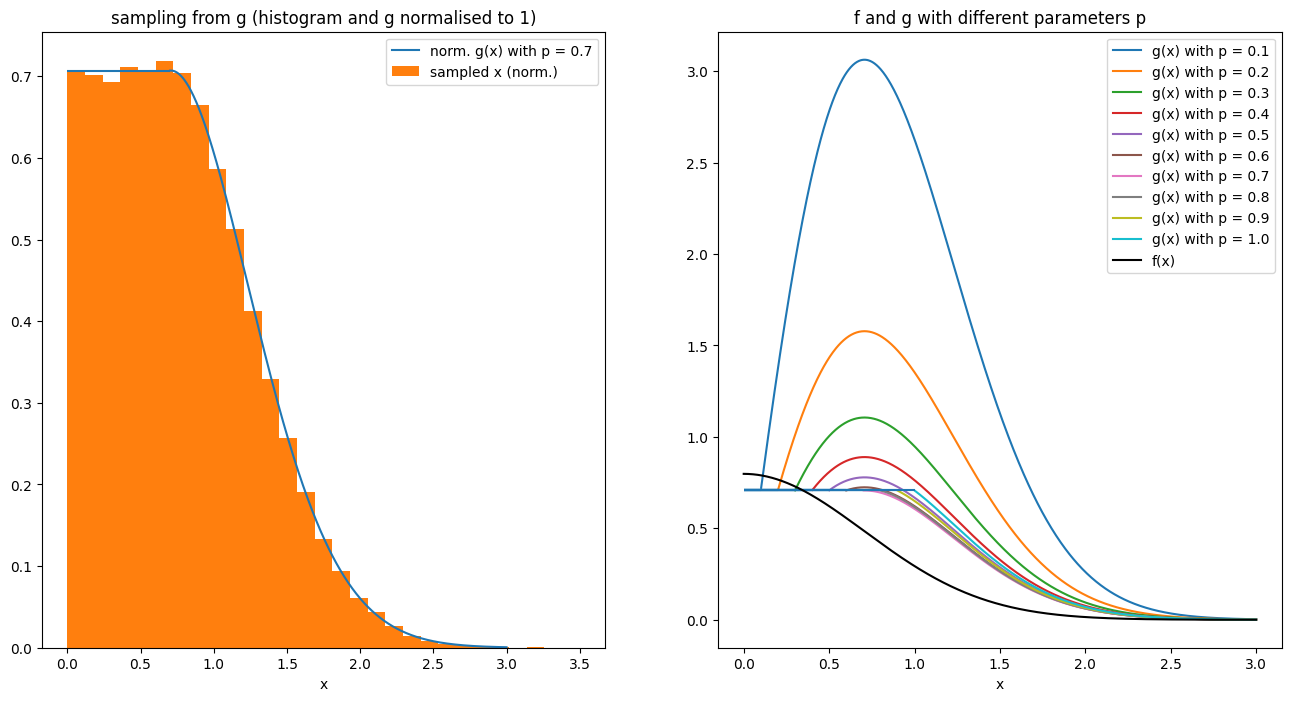

In [30]:
data3=[]
with open('data3.csv') as csvfile:
    contents = csv.reader(csvfile, delimiter=";")
    next(contents)
    for row in contents:
    
        data3.append(np.asarray(row).astype('float64'))
        
x=np.linspace(0,3,1000)
fig, axs= plt.subplots(1,2,figsize=(16,8))
p=0.7

N=100000
A=2*np.sqrt(1/np.pi)
norm= A*p +A/(2*p)

A=1/(p+1/(2*p))
x2=x[x>=p]


axs[0].set_title("sampling from g (histogram and g normalised to 1)")
axs[0].set_xlabel("x")

axs[0].plot(x2, A/(p)*x2*np.exp(p**2-x2**2),label="norm. g(x) with p = %.1f"%(p))
axs[0].hlines(A,0,p)
axs[0].hist(data3[4],label="sampled x (norm.)", density="True" ,bins=np.linspace(0,3.5,30))
axs[0].legend()


axs[1].set_title("f and g with different parameters p")
ps=np.linspace(0.1,1,10)
for p in ps:
    x2=x[x>=p]
    axs[1].plot(x2, A/p*x2*np.exp(p**2-x2**2),label="g(x) with p = %.1f"%(p))
    axs[1].hlines(A,0,p)
axs[1].plot(x,np.sqrt(2/np.pi)*np.exp(-x**2), color="black",label= "f(x)")
axs[1].set_xlabel("x")
axs[1].legend()




The sampling works very well. on the left, I plottet f(x) in black, along with g(x) for different p. one can clearly see that, When $p =2/3$, the transition from the constant happens right where g(x) has its maximum, and most cosely resembles the function f(x). This is why this was chosen as the parameter in teh sampling, as having an even worse g would result in less efficient sampling. the constant $c$ used in the criterion should be close to 1, and  after trying different values.I chose $c = 1.7$. choosing a bigger c means that the sampling rejects more values, but also ensures that the resulting distribution more closely resembles f(x) rather than g(x). one could probably use a lower number. The parameter p could also be optimised more carefully, by actually finding the minima of f(x)/g(x)*c with respect to the parameters p and c but as optimising efficency is not really important here, I left it at my initial estimates. 

In the cell below, the final result of the rejection sampling is plotted in a normalised histogram, along with a normalised f(x) (see handwritten notes). The rejection sampling works very well.



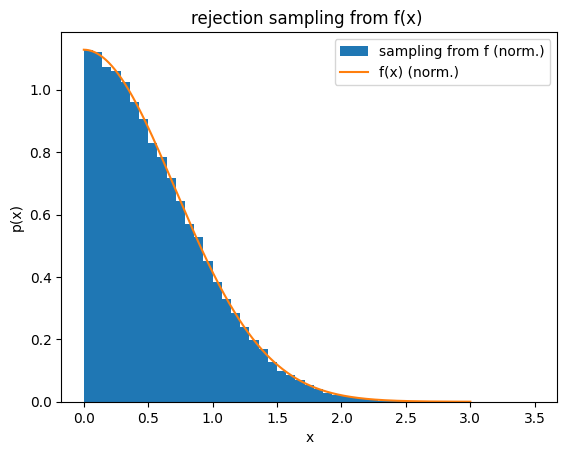

In [22]:
rejection_distr = data3[5]

plt.title("rejection sampling from f(x) ")


plt.hist(rejection_distr,label="sampling from f (norm.)", density="True", bins=np.linspace(0,3.5,50))
plt.xlabel("x")
plt.ylabel("p(x)")
plt.plot(x,2*np.sqrt(1/np.pi)*np.exp(-x**2),label= "f(x) (norm.)")
plt.legend()
plt.show()

## Exercise 4: Importance sampling

### Integrating a function $f(x)= e^{-x²} g(x)$ where g is slowly varying

As an example function I first tried $g(x) =  \sqrt{x} $ as a simple but nontheless interesting example. As described in the exercise, When sampling $ x_i $ from $ W(x_i) = \frac{2}{\sqrt{\pi} }e^{-x²}$, an estimate of the integral is simply given by
  $$  I \; = \; \int_0^\infty f(x)\ dx \; \approx \; \frac{1}{N} \sum_{i=0}^N \frac{f(x_i)}{W(x_i)} =  \frac{1}{N} \sum_{i=0}^N \frac{\sqrt{\pi}}{2} g(x_i)$$
This, as well as a crude Monte Carlo algorithm where the integral is simply estimate as
$$ I \; = \; \int_0^\infty f(x)\ dx \; \approx \int_a^{b}f(x)\ dx \;\approx \frac{(b-a)}{N} \sum_{i=0}^N f(x_i)$$

where $ X_i $ is simply uniformly sampled from the interval of integration. In this case for the integral $[0, \infty) $ when integrating numericaly as infinity can not be reached one has to define a finite end to the interval. As it is safe to assume that the function goes towards zero quickly, I have chosen the Intervall [0,1000] setting $b$ higher means that a much higher number of samples must be taken in order to actually hit the distribution.

Both methods were then implemented in exercise4.c, using the rejection sampling from 3c) to do the sampling according to $W(x_i)$. The results of the integration for different steps N of both algorithms are plotted below, together with an estimate of the integral from an online integral solver, $I_{true} =  0.6127083512325888$


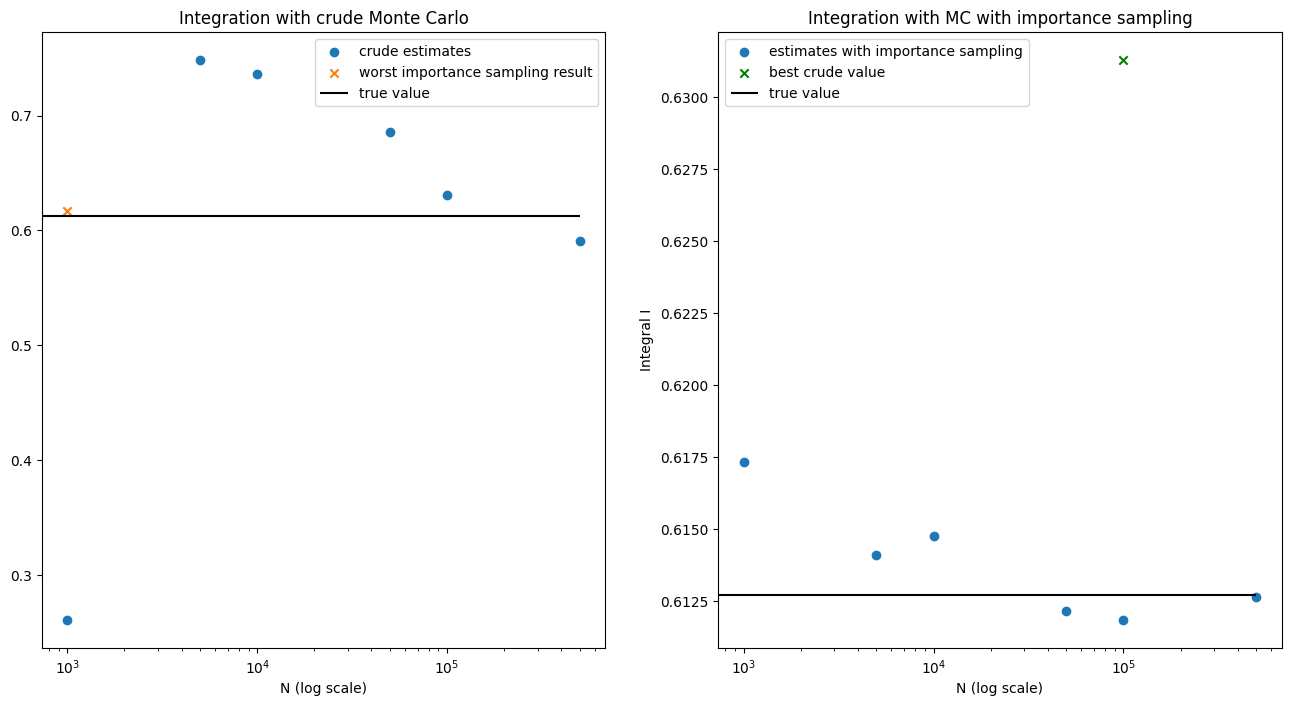

In [23]:


data4=[]
with open('data4.csv') as csvfile:
    contents = csv.reader(csvfile, delimiter=";")
    next(contents)
    for row in contents:
        data4.append(np.asarray(row).astype('float64'))
Ns=data4[0]
crude_integrals=data4[1]
importance_integral= data4[2]

true_val= 0.6127083512325888
fig,axs =plt.subplots(1,2,figsize=(16,8))
axs[0].set_title("Integration with crude Monte Carlo")
axs[0].set_xlabel("N (log scale)")
axs[0].scatter(Ns,crude_integrals,label="crude estimates")
axs[0].scatter(Ns[0],importance_integral[0],marker="x", label="worst importance sampling result")
axs[0].hlines(true_val,0,500000,color="black",label="true value")
axs[0].set_xscale('log')
axs[0].legend()

axs[1].set_title("Integration with MC with importance sampling")
axs[1].set_xlabel("N (log scale)")
axs[1].scatter(Ns,importance_integral,label="estimates with importance sampling")
j=np.argmin(np.abs(crude_integrals-true_val))

axs[1].scatter( Ns[j], crude_integrals[j], marker="x", color="green",label="best crude value")
axs[1].hlines(true_val,0,500000,color="black", label="true value")
axs[1].set_ylabel("Integral I")
axs[1].set_xscale('log')
axs[1].legend()
plt.show()


Clearly, with importance sampling a quite acurate estimate can already be reached for a very low number of steps, where the crude MC is essentially useless, especially when considering the different yscales of the plots. The worst of the estimates using the importance sampling is similarly close to the true value as the second best crude estimate. Also, the fluctuations of the crude MC even at high N are still much larger than in the importance sampling,which is bad when you want ot only high accuracy but also consitency. The estimates with importance sampling converge much more nicely towards the true value

### Importance sampling for integrating $\int_0^{\frac{\pi}{2}} cos(x)$

The Integral can be estimated with  $$ I = \int_0^{\frac{\pi}{2}} cos(x) \approx \; \frac{1}{N} \sum_{i=0}^N \frac{z \;cos(x_i)}{g_*(x_i)} $$
where $z$ is the normalisation constant of the normalised proposal density $$ g_*(X)= \frac{1}{z} (a + b x²)$$
From considering the Taylor expansion of the cosine, $a = 1 $and $b = 0.5 $ seem ideal, but one has to pay attention that $g(x) >0$ for all x, and thus I chose $a = 1 $and $b = 0.4 $ .

As  $g_*$ is hard to sample from using inversion, I used rejection sampling with the easy to invert helper function $h(x)= \frac{1}{c} (1-0.5x)$ and $c=1.3$.

The sampling of the helper function  $h$ as well as the sampling of $g_*$ is plotted below, and works very well. 

The Integration was then carried out with importance sampling.
The end result is I = 1.00645, with N= 55, coming very close to the true value of I=1!





In [24]:
data4=[]
with open('data4.csv') as csvfile:
    contents = csv.reader(csvfile, delimiter=";")
    next(contents)
    for row in contents:
        data4.append(np.asarray(row).astype('float64'))
        


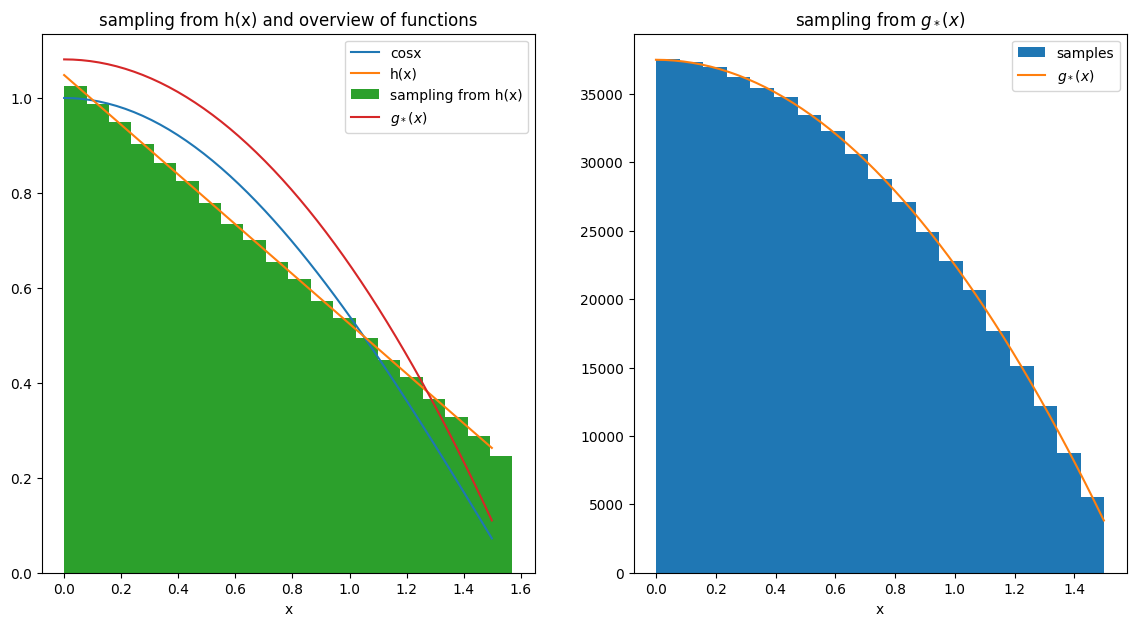

In [31]:
h= data4[3]
g_star=data4[4]

c= np.pi/2*(1-np.pi/8)
z= np.pi/2*(1-np.pi**2/24)
x= np.linspace(0, np.pi*c/(2))
fig,axs=plt.subplots(1,2,figsize=(14,7))
axs[0].set_title("sampling from h(x) and overview of functions")
axs[0].plot(x, np.cos(x), label="cosx")

axs[0].plot(x, (1-0.5*x)/c,label="h(x)")

axs[0].hist(h, density=True, bins= 20,label="sampling from h(x)")
axs[0].plot(x, (1-0.4*x**2)/z,label="$g_*(x)$")
axs[0].legend()
axs[0].set_xlabel("x")

axs[1].set_title("sampling from $g_*(x)$")

axs[1].set_xlabel("x")
axs[1].hist(g_star,bins =np.linspace(0,1.5,20),label= "samples")
axs[1].plot(x, (1-0.4*x**2)*500000*1.5/20, label = "$g_*(x)$")
axs[1].legend()

The parameters of g(x) could also be optimized by minimizing the Variance of the ratio of the functions, similarly to what is done in the next exercise.
$$ Var_g\left(\frac{f}{g}\right) = \int_0^{\frac{\pi}{2}} \left( \frac{cos(x) }{g(x)}\right) ²g(x) dx $$
The problem I encountered here is that this integral is not solvable analytically, and lacking a concrete expression for the variance to minimize, I did not know how to continue with this optimisation. 

### The effect of Importance sampling

See handwritten notes for the derivation of the formulas.



In [33]:

Ts = [3,5,10,20]
for T in Ts:
    a=(-np.sqrt(T*T+1) +T +1) / T
    f_mean= np.exp(-T)
    var_f= f_mean-f_mean**2

    var_fg= np.exp(-T*(2-a))/(a*(2-a)) -np.exp(-2*T)
    print("\nfor T= %d" %T)
    print("ratio of variances: %.2f"%(var_f/var_fg))
    print("var_f / f_mean : %f"%((var_f )/f_mean))
    print("var_f/g / f_mean : %f"%(var_fg /f_mean))

    



for T= 3
ratio of variances: 5.01
var_f / f_mean : 0.950213
var_f/g / f_mean : 0.189674

for T= 5
ratio of variances: 22.65
var_f / f_mean : 0.993262
var_f/g / f_mean : 0.043850

for T= 10
ratio of variances: 1657.59
var_f / f_mean : 0.999955
var_f/g / f_mean : 0.000603

for T= 20
ratio of variances: 18055473.67
var_f / f_mean : 1.000000
var_f/g / f_mean : 0.000000


One can see that the importance sampling makes the variance and thus the error of the estimate, go down, while keeping the mean the same. For bigger T, the variance with importance sampling becomes smaller and smaller, meaning the error of the mean becomes lower and lower. Without importanec sampling, for T=20, the estimate of the mean is essentially meaningless,as the variance  of the estimate is basically the same as the value of the mean. WIth importance sampling, the error of teh mean goes down to very close to zero.